## Assignment 3 Solutions

Author: Laura Bissoltan

## Problem 1

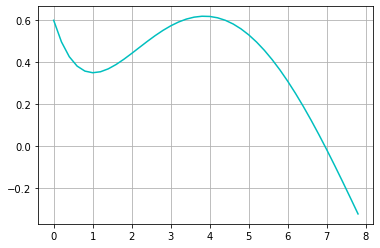

In [8]:
#1.1

from math import pi,sin,cos,e
from matplotlib import pyplot as plt
import numpy as np

l=16
t=12
v=48
def f(x):
    return sin(2*pi*x/l)*cos(2*pi*t*v/l)+e**(-x)-0.4
def F(x):
    return 1
def g(x):
    return x+f(x)/F(x)


def fixedpoint(f,x0,tol,imax):   
    for i in range(1,imax+1):
        xr=g(x0)
        if abs(x0-xr)<tol:break
        x0=xr
    return xr

x=np.arange(0,8,0.2)
f2=np.vectorize(f)
plt.plot(x,f2(x), 'c')
plt.grid()
plt.show()

#from plot it can be seen that lowest point is very close to 7



In [9]:
#1.2

print("The root xr is", '{0:.12f}'.format(fixedpoint(f,6.9,0.01,100)))
print("h(xr)/h0 is", '{0:.12f}'.format(f(6.940376047385)+0.4))


The root xr is 6.940376047385
h(xr)/h0 is 0.405176433464


## Problem 2

In [10]:
#2.1

P=20000 #Present_worth/$
n=6 #time/years
A=4000 #annual_payments/$

def f(i):
    return ((P*i*(1+i)**n)/((1+i)**n-1))-A

def secant(x0,delta,imax):
    for i in range(1,imax+1):
        x1=x0-(delta*x0*f(x0))/(f(x0+delta*x0)-f(x0))
        if abs(x0-x1)<1e-5:break
        x0=x1
    return x1



In [11]:
#2.2

print("Interest rate is", '{0:.2f}'.format(secant(1,0.01,100)*100),"%")

Interest rate is 5.47 %


## Problem 3

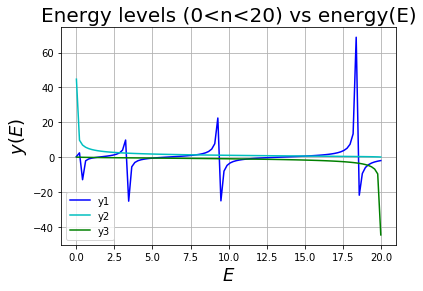

The energies of the first six energy levels of the particle are (in eV) 0.319, 1.275, 2.85, 5.05, 7.85, 11.21.


In [12]:
#3.1

from math import tan,sqrt
import numpy as np
%matplotlib inline

m=9.1094*10**-31 #kg
V=20 #eV
w=10**-9 #m
h1=1.0545*10**-34 #J*s=kg*m^2s^(-2)*s
h2=6.5821*10**-16 #eV*s

E = np.linspace(0.01,19.99,100) #in order to prevent zero division error open interval used 

def y1(E):
    return tan(sqrt((w**2*m*E)/(2*h1*h2)))

def y2(E):
    return sqrt((V-E)/E)

def y3(E):
    return -sqrt(E/(V-E))

y11=np.vectorize(y1)
y22=np.vectorize(y2)
y33=np.vectorize(y3)

plt.plot(E,y11(E),'b',E,y22(E),'c',E,y33(E),'g')
plt.title("Energy levels (0<n<20) vs energy(E)", size=20)
plt.xlabel(r'$E$',size=18)
plt.ylabel(r'$y(E)$',size=18)
plt.legend(["y1", "y2", "y3"])
plt.grid()
plt.show()

print("The energies of the first six energy levels of the particle are (in eV) 0.319, 1.275, 2.85, 5.05, 7.85, 11.21.")

In [13]:
#3.2

def even(x):
    return y1(x)-y2(x)

def odd(x):
    return y1(x)-y3(x)
    
xr=0
N_iter=0
def false_pos(f,x1,x2):
    if f(x1)*f(x2)<0:      
        for N_iter in range(1,101):
            xr=x2-((x2-x1)/(f(x2)-f(x1)))*f(x2)
            if abs(x1-x2)<0.001: break
            elif f(x1)*f(xr)<0:
                x2=xr
            else:
                x1=xr
        return xr, N_iter

In [14]:
#3.3

E0=false_pos(even,0.20,0.35)
E1=false_pos(odd,1.20,1.35)
E2=false_pos(even,2.5,3.0)
E3=false_pos(odd,4.5,5.5)
E4=false_pos(even,7,8)
E5=false_pos(odd,11,12)

lst1=[E0[0],E1[0],E2[0],E3[0],E4[0],E5[0]]
lst2=[E0[1],E1[1],E2[1],E3[1],E4[1],E5[1]]
lst3=["[0.20,0.35]","[1.20,1.35]","[2.50,3.00]","[4.50,5.50]","[7.00,8.00]","[11.0,12.0]"]

print("\nTable 1: The energies of the first six energy levels of the particle")
print(' {:4} {:15} {:15} {:15} \033[0m'.format('n','E_n','[E_l,E_r]', 'N_iter'))
for i in range(0,6):
    print(f'{i:2} {lst1[i]:10.6f}{"       "} {lst3[i]:10}  {lst2[i]:8} ')




Table 1: The energies of the first six energy levels of the particle
 n    E_n             [E_l,E_r]       N_iter          
 0   0.317918        [0.20,0.35]        57 
 1   1.269993        [1.20,1.35]        12 
 2   2.850837        [2.50,3.00]        27 
 3   5.050082        [4.50,5.50]        24 
 4   7.849333        [7.00,8.00]        15 
 5  11.214375        [11.0,12.0]        16 
